Matplotlib是Python中最基本的可视化工具。我们来类比下人类画图和Mat画图的过程


![1](./img/类比人类绘画和Matplotlib绘画.png)

我们平时画图主要分为三步,即找画板、调色（使用调色板）、画画。Matplotlib模拟了这个过程，也分三步：FigureCanvas、Renderer、Artist，这同时也是Matplotlib里的三层API，分别是F帮你确定画图的地方、R帮你把想画的东西展示在屏幕上和A帮你用R在F上画图。

这里推荐一组配色，看着非常舒服美观。

In [38]:
r_hex = '#dc2624'  # red,       RGB = 220,38,36
dt_hex = '#2b4750'  # dark teal, RGB = 43,71,80
tl_hex = '#45a0a2'  # teal,      RGB = 69,160,162
r1_hex = '#e87a59'  # red,       RGB = 232,122,89
tl1_hex = '#7dcaa9'  # teal,      RGB = 125,202,169
g_hex = '#649E7D'  # green,     RGB = 100,158,125
o_hex = '#dc8018'  # orange,    RGB = 220,128,24
tn_hex = '#C89F91'  # tan,       RGB = 200,159,145
g50_hex = '#6c6d6c'  # grey-50,   RGB = 108,109,108
bg_hex = '#4f6268'  # blue grey, RGB = 79,98,104
g25_hex = '#c7cccf'  # grey-25,   RGB = 199,204,207

![1](./img/画图配色.png)

# Matplotlib中的图与轴

画图中一般包含两类元素,即基础(primitives）类和容器(containers)类。

基础类是我们想画出的标准对象，如线（line）、点(marker)、文字（text）、图例（legend）、网格（grid）、标题（title）、图片（image）等。

容器类是基础类元素的寄居处，有图（figure）,坐标系（axes），坐标轴（axis）和刻度（tick），层级结构为图→坐标系→坐标轴→刻度。图包含着坐标系（多个），坐标系由坐标轴组成(横轴 xAxis 和纵轴 yAxis)，坐标轴上面有刻度(主刻度 MajorTicks 和副刻度 MinorTicks)。

In [39]:
import matplotlib as mpy
import matplotlib.pyplot as plt
%matplotlib inline

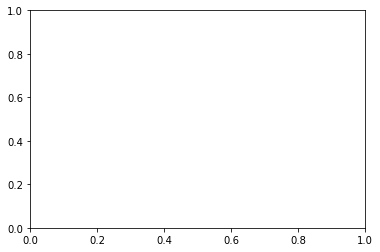

fig.axes: [<matplotlib.axes._subplots.AxesSubplot object at 0x0000022C6C997F98>] 

ax.xaxis: XAxis(54.000000,36.000000)
ax.yaxis: YAxis(54.000000,36.000000) 

ax.xaxis.majorTicks: [<matplotlib.axis.XTick object at 0x0000022C6C9A2320>, <matplotlib.axis.XTick object at 0x0000022C6C992C18>, <matplotlib.axis.XTick object at 0x0000022C6C82C908>, <matplotlib.axis.XTick object at 0x0000022C6C830240>, <matplotlib.axis.XTick object at 0x0000022C6C8306D8>, <matplotlib.axis.XTick object at 0x0000022C6C830BE0>] 

ax.yaxis.majorTicks: [<matplotlib.axis.YTick object at 0x0000022C6C99D080>, <matplotlib.axis.YTick object at 0x0000022C6C9A2978>, <matplotlib.axis.YTick object at 0x0000022C6C8210B8>, <matplotlib.axis.YTick object at 0x0000022C6C821438>, <matplotlib.axis.YTick object at 0x0000022C6C821B38>, <matplotlib.axis.YTick object at 0x0000022C6C8170B8>] 

ax.xaxis.minorTicks: [<matplotlib.axis.XTick object at 0x0000022C6C99DB38>]
ax.yaxis.minorTicks: [<matplotlib.axis.YTick object at 0x0000022C6C9A

In [40]:
# Python中万物皆对象,Matplotlib里这些元素也都是对象,我们通过打印来加深了解
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.show()

xax = ax.xaxis
yax = ax.yaxis

print('fig.axes:', fig.axes, '\n')
print('ax.xaxis:', xax)
print('ax.yaxis:', yax, '\n')
print('ax.xaxis.majorTicks:', xax.majorTicks, '\n')
print('ax.yaxis.majorTicks:', yax.majorTicks, '\n')
print('ax.xaxis.minorTicks:', xax.minorTicks)
print('ax.yaxis.minorTicks:', yax.minorTicks)

In [41]:
# 由坐标系和坐标轴指向同一个图
print('axes.figure:', ax.figure)
print('xaxis.figure:', xax.figure)
print('yaxis.figure:', yax.figure)

axes.figure: Figure(432x288)
xaxis.figure: Figure(432x288)
yaxis.figure: Figure(432x288)


我们在图、坐标系、坐标轴和刻度创造完以后，就可以在上面添加各种基础元素了。如在坐标轴和刻度上添加标签，在坐标系中添加线、点、网格、图例和文字，以及在图中添加图例。如下图所示：

![1](./img/画图中的元素.png)

## 图

图是整个层级的顶部。

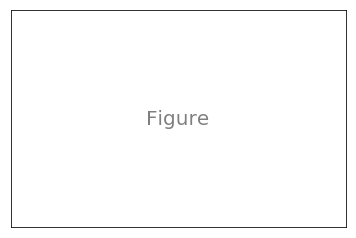

In [42]:
# 可以在其中添加基本元素‘文字’
plt.figure()
plt.text(0.5, 0.5, 'Figure', ha='center', va='center', size=20, alpha=.5)
plt.xticks([]), plt.yticks([])
plt.show()

plt.text()，参数解释如下：

- 第一、二参数指横轴和纵轴的坐标值

- 第三个参数字符是要显示的内容

- ha、va是横向和纵向位置

- size 设置字体大小

- alpha 设置字体透明度（0.5是半透明）

In [43]:
# 添加‘图片’
from PIL import Image
plt.figure()
plt.xticks([]), plt.yticks([])
im = np.array(Image.open('Houston Rockets.png'))
plt.imshow(im)
plt.shwo()

ModuleNotFoundError: No module named 'PIL'

用Image.open()将图片转成像素存在ndarray中，再用plt.imshow()展示

In [ ]:
# 添加'折线'
plt.figure()
plt.plot([0, 1], [0, 1])
plt.show()

用plt.plot()函数来画折线图,前两个参数分别是x和y.

这里注意一点,每次画图看起来下像是在Figure上进行,实际上是在坐标系Axes中进行的.一幅图可以由多个坐标系,这样进行设置时会更加灵活.

## 坐标系&子图

坐标系(Axes)和子图(Subplot)大多数情况下可以等同看待,但有一点细微差别:子图在母图中的网络结构一定是规则的,而坐标系在母图中的网络结构可以是不规则的.因此子图可以看做是坐标系的一个特例.

### 子图

把图想成是矩阵,那么子图就是矩阵中的元素,可以像定义矩阵那样定义子图(行数、列数、第几个子图)，两者是相通的。

subplot(rows,columns,i-th plots)

In [ ]:
# 声明一个1x2子图
plt.subplot(2, 1, 1)
plt.xticks([]), plt.yticks([])
plt.text(
    0.5, 0.5, 'subplot(2,1,1)', ha='center', va='center', size=20, alpha=.5)

plt.subplot(2, 1, 2)
plt.xticks([]), plt.yticks([])
plt.text(
    0.5, 0.5, 'subplot(2,1,2)', ha='center', va='center', size=20, alpha=.5)

plt.show()

这两个子图类似于一个列向量。声明完子图后，下面所有代码就只在这幅子图上生效，直到声明下一幅子图。

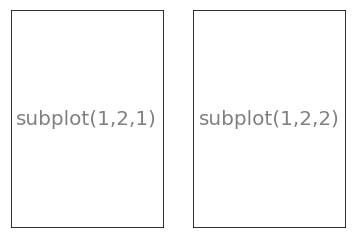

In [44]:
# 声明一个2x1子图
plt.subplot(1, 2, 1)
plt.xticks([]), plt.yticks([])
plt.text(
    0.5, 0.5, 'subplot(1,2,1)', ha='center', va='center', size=20, alpha=.5)

plt.subplot(1, 2, 2)
plt.xticks([]), plt.yticks([])
plt.text(
    0.5, 0.5, 'subplot(1,2,2)', ha='center', va='center', size=20, alpha=.5)

plt.show()

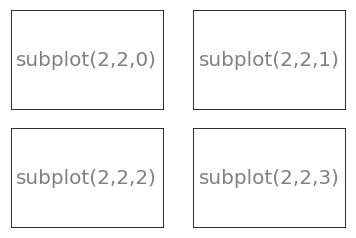

In [45]:
# 声明一个2x2子图
fig, axes = plt.subplots(nrows=2, ncols=2)

for i, ax in enumerate(axes.flat):
    ax.set(xticks=[], yticks=[])
    s = 'subplot(2,2,' + str(i) + ')'
    ax.text(0.5, 0.5, s, ha='center', va='center', size=20, alpha=.5)

plt.show()

第一行是用坐标系来生成子图

fig,axes=plt.subuplots(norws=2,ncols=2)

得到的axes是一个2x2的对象.在第三行的for循环中用axes.flat将其打平,然后在每个ax上生成子图.

### 坐标系

坐标系比子图更通用，有两种生成方式：

- 用gridspec包加上subplot()
- 用plt.axes()

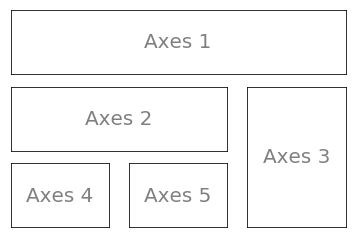

In [46]:
# 不规则网格
import matplotlib.gridspec as gridspec
G = gridspec.GridSpec(3, 3)

ax1 = plt.subplot(G[0, :])
plt.xticks([]), plt.yticks([])
plt.text(0.5, 0.5, 'Axes 1', ha='center', va='center', size=20, alpha=.5)

ax2 = plt.subplot(G[1, :-1])
plt.xticks([]), plt.yticks([])
plt.text(0.5, 0.5, 'Axes 2', ha='center', va='center', size=20, alpha=.5)

ax3 = plt.subplot(G[1:, -1])
plt.xticks([]), plt.yticks([])
plt.text(0.5, 0.5, 'Axes 3', ha='center', va='center', size=20, alpha=.5)

ax4 = plt.subplot(G[-1, 0])
plt.xticks([]), plt.yticks([])
plt.text(0.5, 0.5, 'Axes 4', ha='center', va='center', size=20, alpha=.5)

ax5 = plt.subplot(G[-1, -2])
plt.xticks([]), plt.yticks([])
plt.text(0.5, 0.5, 'Axes 5', ha='center', va='center', size=20, alpha=.5)

plt.show()

第二行将整幅图分成3x3份并赋值给G,第4,8,12,16,20行分别用

plt.subplot(G[])

生成五个坐标系.G[]里面的切片和Numpy数组用法一样:


- G[0, :] = 图的第一行 (Axes 1)

- G[1, :-1] = 图的第二行，第一二列 (Axes 2)

- G[1:, -1] = 图的第二三行，第三列 (Axes 3)

- G[-1, 0] = 图的第三行，第一列 (Axes 4)

- G[-1, -2] = 图的第三行，第二列 (Axes 5)

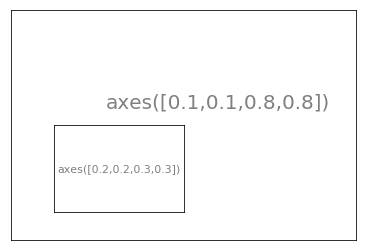

In [47]:
# 大图套小图

plt.axes([0.1, 0.1, 0.8, 0.8])
plt.xticks([]), plt.yticks([])
plt.text(
    0.6,
    0.6,
    'axes([0.1,0.1,0.8,0.8])',
    ha='center',
    va='center',
    size=20,
    alpha=.5)

plt.axes([0.2, 0.2, 0.3, 0.3])
plt.xticks([]), plt.yticks([])
plt.text(
    0.5,
    0.5,
    'axes([0.2,0.2,0.3,0.3])',
    ha='center',
    va='center',
    size=11,
    alpha=.5)

plt.show()

第 3和第7 行分别用



    plt.axes([l,b,w,h]) 



其中 [l, b, w, h] 可以定义坐标系



- l 代表坐标系左边到 Figure 左边的水平距离

- b 代表坐标系底边到 Figure 底边的垂直距离

- w 代表坐标系的宽度

- h 代表坐标系的高度



如果 l, b, w, h 都小于 1，那它们是标准化 (normalized) 后的距离。比如 Figure 底边长度为 10， 坐标系底边到它的垂直距离是 2，那么 b = 2/10 = 0.2。



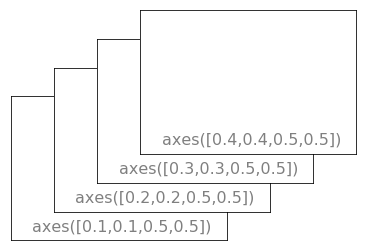

In [48]:
# 重叠图

plt.axes([0.1, 0.1, 0.5, 0.5])
plt.xticks([]), plt.yticks([])
plt.text(
    0.1,
    0.1,
    'axes([0.1,0.1,0.5,0.5])',
    ha='left',
    va='center',
    size=16,
    alpha=.5)

plt.axes([0.2, 0.2, 0.5, 0.5])
plt.xticks([]), plt.yticks([])
plt.text(
    0.1,
    0.1,
    'axes([0.2,0.2,0.5,0.5])',
    ha='left',
    va='center',
    size=16,
    alpha=.5)

plt.axes([0.3, 0.3, 0.5, 0.5])
plt.xticks([]), plt.yticks([])
plt.text(
    0.1,
    0.1,
    'axes([0.3,0.3,0.5,0.5])',
    ha='left',
    va='center',
    size=16,
    alpha=.5)

plt.axes([0.4, 0.4, 0.5, 0.5])
plt.xticks([]), plt.yticks([])
plt.text(
    0.1,
    0.1,
    'axes([0.4,0.4,0.5,0.5])',
    ha='left',
    va='center',
    size=16,
    alpha=.5)

plt.show()

### 两种生成坐标系的推荐代码

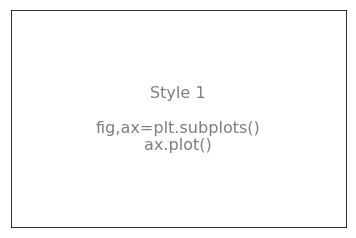

In [49]:
# 同时生成图和坐标系
fig, ax = plt.subplots()
ax.set(xticks=[], yticks=[])
s = "Style 1\n\nfig,ax=plt.subplots()\nax.plot()"
ax.text(0.5, 0.5, s, ha='center', va='center', size=16, alpha=.5)

plt.show()

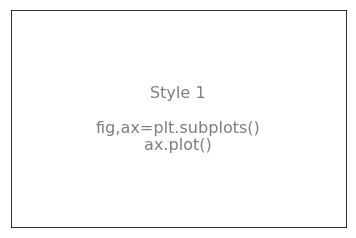

In [50]:
# 先生成图,再添加坐标系
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set(xticks=[], yticks=[])
s = "Style 1\n\nfig,ax=plt.subplots()\nax.plot()"
ax.text(0.5, 0.5, s, ha='center', va='center', size=16, alpha=.5)

plt.show()

In [51]:
# 注意以上代码刻意将坐标轴隐去
# plt.xticks([]),plt.yticks([]) 或 ax.set(xticks=[],yticks=[])

### 坐标轴

一个坐标系通常包含XAxis和YAxis两条坐标轴,每条坐标轴上包含两个元素,即有容器类元素'刻度'和基础类元素'标签'

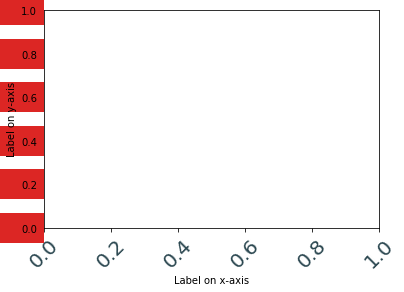

In [52]:
fig, ax = plt.subplots()
ax.set_xlabel('Label on x-axis')
ax.set_ylabel('Label on y-axis')

for label in ax.xaxis.get_ticklabels():
    # label is a Text instance
    label.set_color(dt_hex)  # 设置标签颜色为深青色
    label.set_rotation(45)  # 设置标签旋转度45度
    label.set_fontsize(20)  # 设置标签字体大小为20

for line in ax.yaxis.get_ticklines():
    # line is a Line2D instance
    line.set_color(r_hex)  # 设置刻度颜色为红色
    line.set_markersize(500)  # 设置刻度长度500
    line.set_markeredgewidth(30)  # 设置刻度宽度30

In [53]:
# 打印x轴的标签
ax.xaxis.get_label()
# 打印x轴的刻度位置点
ax.xaxis.get_ticklocs()
# 打印x轴的刻度标签
ax.xaxis.get_ticklabels()
# 打印x轴的刻度线
ax.xaxis.get_ticklines()
# 打印刻度标签位置
ax.xaxis.get_ticks_position()
# 打印x轴主刻度
ax.xaxis.get_major_ticks()

### 刻度

刻度的核心内容就是一条短线(刻度本身)和一串字符(刻度标签)

In [54]:
# 为显示不同类型的刻度,首先来定义一个函数
import matplotlib.ticker as ticker


def setup(ax):
    # 去除左纵轴(y轴),左纵轴和上横轴
    ax.spines['left'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    # 去除y轴上的刻度
    ax.yaxis.set_major_locator(ticker.NullLocator())
    # 将x轴上的刻度位置定在轴底
    ax.xaxis.set_ticks_position('bottom')

    # 设置主刻度和复刻度的长度和宽度
    ax.tick_params(which='major', width=2.00)
    ax.tick_params(which='major', length=10)
    ax.tick_params(which='minor', width=0.75)
    ax.tick_params(which='minor', length=2.5)

    # 设置x轴和y轴的边界
    ax.set_xlim(0, 5)
    ax.set_ylim(0, 1)

    # 将图中patch设成完全透明
    ax.patch.set_alpha(0.0)

为了感受一下上面每个操作对原图产生的效果，我们画出 6 个子图，其中



第一幅是原图

第二幅处理左、右、上轴

第三幅处理刻度标签

第四幅处理刻度尺寸

第五幅处理坐标轴边界

第六幅处理颜色和透明度



代码如下：

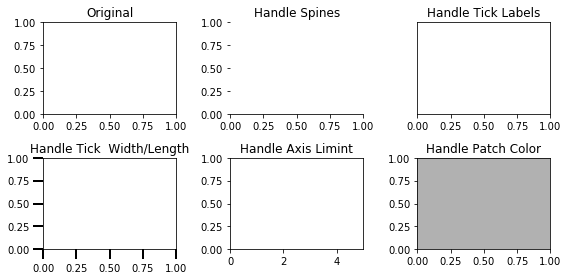

In [55]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(8, 4))

axes[0, 0].set_title('Original')

axes[0, 1].spines['right'].set_color('none')
axes[0, 1].spines['left'].set_color('none')
axes[0, 1].spines['top'].set_color('none')
axes[0, 1].set_title('Handle Spines')

axes[0, 2].yaxis.set_major_locator(ticker.NullLocator())
axes[0, 2].xaxis.set_ticks_position('bottom')
axes[0, 2].set_title('Handle Tick Labels')

axes[1, 0].tick_params(which='major', width=2.00)
axes[1, 0].tick_params(which='major', length=10)
axes[1, 0].tick_params(which='minor', width=0.75)
axes[1, 0].tick_params(which='minor', length=2.5)
axes[1, 0].set_title("Handle Tick  Width/Length")

axes[1, 1].set_xlim(0, 5)
axes[1, 1].set_ylim(0, 1)
axes[1, 1].set_title("Handle Axis Limint")

axes[1, 2].patch.set_color('black')
axes[1, 2].patch.set_alpha(0.3)
axes[1, 2].set_title("Handle Patch Color")

plt.tight_layout()  # 坐标系在图中均匀分布
plt.show()

#### 刻度展示

不同的 locator() 可以生成不同的刻度对象，我们来研究以下 8 种：



- NullLocator(): 空刻度

- MultipleLocator(a): 刻度间隔 = 标量 a

- FixedLocator(a): 刻度位置由数组 a 决定

- LinearLocator(a): 刻度数目 = a, a 是标量

- IndexLocator(b, o): 刻度间隔 = 标量 b，偏移量 = 标量 o

- AutoLocator(): 根据默认设置决定

- MaxNLocator(a): 最大刻度数目 = 标量 a

- LogLocator(b, n): 基数 = 标量 b，刻度数目 = 标量 n

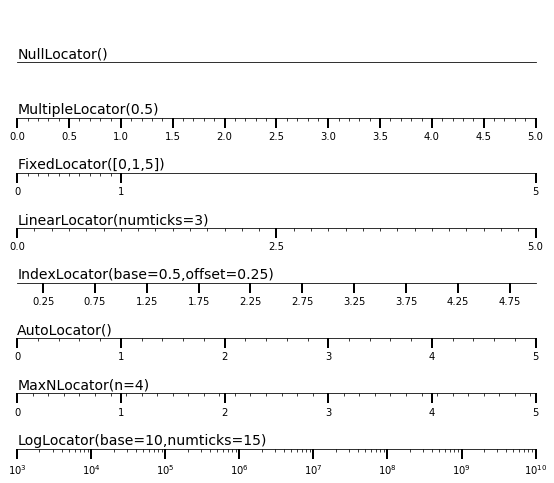

In [56]:
import numpy as np
plt.figure(figsize=(8, 6))
n = 8

# Null Locator
ax = plt.subplot(n, 1, 1)
setup(ax)
ax.xaxis.set_major_locator(ticker.NullLocator())
ax.xaxis.set_minor_locator(ticker.NullLocator())
ax.text(0.0, 0.1, "NullLocator()", fontsize=14, transform=ax.transAxes)

# Multiple Locator
ax = plt.subplot(n, 1, 2)
setup(ax)
ax.xaxis.set_major_locator(ticker.MultipleLocator(0.5))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.1))
ax.text(0.0, 0.1, "MultipleLocator(0.5)", fontsize=14, transform=ax.transAxes)

# Fixed Locator
ax = plt.subplot(n, 1, 3)
setup(ax)
majors = [0, 1, 5]
ax.xaxis.set_major_locator(ticker.FixedLocator(majors))
minors = np.linspace(0, 1, 11)[1:-1]
ax.xaxis.set_minor_locator(ticker.FixedLocator(minors))
ax.text(0.0, 0.1, "FixedLocator([0,1,5])", fontsize=14, transform=ax.transAxes)

# Linear Locator

ax = plt.subplot(n, 1, 4)
setup(ax)
ax.xaxis.set_major_locator(ticker.LinearLocator(3))
ax.xaxis.set_minor_locator(ticker.LinearLocator(31))
ax.text(
    0.0, 0.1, "LinearLocator(numticks=3)", fontsize=14, transform=ax.transAxes)

# Index Locator
ax = plt.subplot(n, 1, 5)
setup(ax)
ax.plot(range(0, 5), [0] * 5, color='White')
ax.xaxis.set_major_locator(ticker.IndexLocator(base=.5, offset=.25))
ax.text(
    0.0,
    0.1,
    "IndexLocator(base=0.5,offset=0.25)",
    fontsize=14,
    transform=ax.transAxes)

# Auto Locator
ax = plt.subplot(n, 1, 6)
setup(ax)
ax.xaxis.set_major_locator(ticker.AutoLocator())
ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
ax.text(0.0, 0.1, "AutoLocator()", fontsize=14, transform=ax.transAxes)

# MaxN Locator
ax = plt.subplot(n, 1, 7)
setup(ax)
ax.xaxis.set_minor_locator(ticker.MaxNLocator(4))
ax.xaxis.set_minor_locator(ticker.MaxNLocator(40))
ax.text(0.0, 0.1, "MaxNLocator(n=4)", fontsize=14, transform=ax.transAxes)

# Log Locator
ax = plt.subplot(n, 1, 8)
setup(ax)
ax.set_xlim(10**3, 10**10)
ax.set_xscale('log')
ax.xaxis.set_major_locator(ticker.LogLocator(base=10.0, numticks=15))
ax.text(
    0.0,
    0.1,
    "LogLocator(base=10,numticks=15)",
    fontsize=14,
    transform=ax.transAxes)

plt.subplots_adjust(left=0.05, right=0.95, bottom=0.05, top=1.05)
plt.show()

## 基础元素

介绍完容器元素,下面来看下基础元素.要画出一幅有内容的图，还需要在容器里添加基础元素比如线 (line), 点 (marker), 文字 (text), 图例 (legend), 网格 (grid), 标题 (title), 图片 (image) 等，具体来说:



- 画一条线，用 plt.plot() 或 ax.plot()

- 画个记号，用 plt.scatter() 或 ax.scatter()

- 添加文字，用 plt.text() 或 ax.text()

- 添加图例，用 plt.legend() 或 ax.legend()

- 添加图片，用 plt.imshow() 或 ax.imshow()




![1](./img/Matplotlib基本元素示意图.png)

# 画美感图

用pd.read_csv读取数据,该函数中三个参数代表：



- index_col = 0 是说把第一列 Date 当成行标签 (index)

- parse_dates = True 是说把行标签转成 date 对象

- dayFirst = True 是说日期是 DD/MM/YYYY 这样的格式 

In [57]:
import pandas as pd
file_data = "./data/data for matplotlib/S&P500.csv"
data = pd.read_csv(file_data, index_col=0, parse_dates=True, dayfirst=True)
data.head(3).append(data.tail(3))

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1950-01-03,16.660000,16.660000,16.660000,16.660000,16.660000,1260000
1950-01-04,16.850000,16.850000,16.850000,16.850000,16.850000,1890000
1950-01-05,16.930000,16.930000,16.930000,16.930000,16.930000,2550000
2019-04-22,2898.780029,2909.510010,2896.350098,2907.969971,2907.969971,2997950000
2019-04-23,2909.989990,2936.310059,2908.530029,2933.679932,2933.679932,3635030000
2019-04-24,2934.000000,2936.830078,2926.050049,2927.250000,2927.250000,3448960000


In [58]:
spx = data[['Adj Close']].loc['2007-01-01':'2010-01-01']
spx.head(3).append(spx.tail(3))

,Adj Close
Date,
2007-01-03,1416.599976
2007-01-04,1418.339966
2007-01-05,1409.709961
2009-12-29,1126.199951
2009-12-30,1126.420044
2009-12-31,1115.099976


## 使用默认设置画图

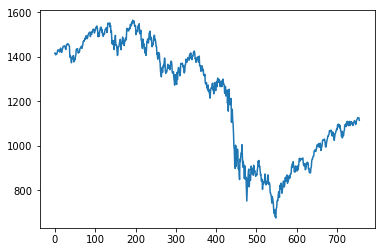

In [59]:
plt.plot(spx.values)
plt.show()

在plot()函数里面只有变量y时(y=spx.values),那么自变量就是默认赋值为range(len(y)).
此外我们没有设置图的尺寸,像素,线的颜色宽度,坐标轴的刻度标签图例标题等等,所有设置都用的是matplotlib的默认设置

## 图的默认设置

In [60]:
# 查看上图所有默认属性
plt.rcParams

D:\YY\Anaconda\envs\Analysis\lib\site-packages\matplotlib\__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.avconv_args': [],
          'animation.avconv_path': 'avconv',
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.html_args': [],
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'black',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-7, 7],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.f

figure size: [6.0, 4.0]
figure dpi: 72.0
line color: C0
line style: -
line width: 1.5
xticks: [-100.    0.  100.  200.  300.  400.  500.  600.  700.  800.]
yticks: [  600.   800.  1000.  1200.  1400.  1600.  1800.]
xlim: (-37.75, 792.75)
ylim: (632.09902925000006, 1609.58102375)


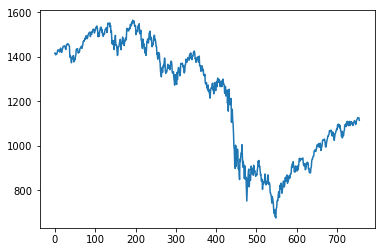

In [61]:
print('figure size:', plt.rcParams['figure.figsize'])
print('figure dpi:', plt.rcParams['figure.dpi'])
print('line color:', plt.rcParams['lines.color'])
print('line style:', plt.rcParams['lines.linestyle'])
print('line width:', plt.rcParams['lines.linewidth'])

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(spx['Adj Close'].values)

print('xticks:', ax.get_xticks())
print('yticks:', ax.get_yticks())
print('xlim:', ax.get_xlim())
print('ylim:', ax.get_ylim())

## 设置尺寸和DPI

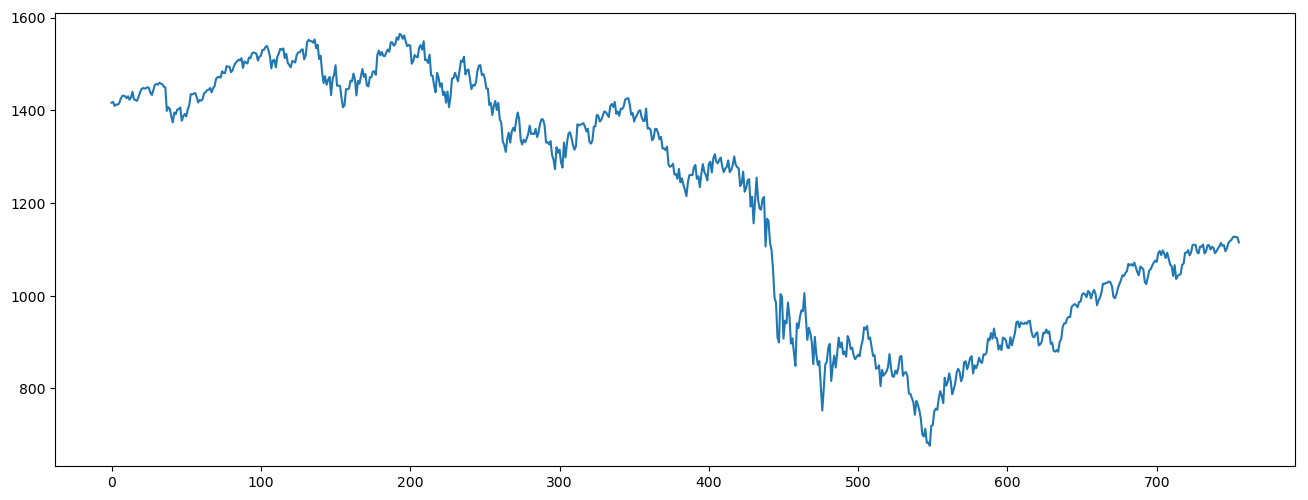

In [62]:
plt.figure(figsize=(16, 6), dpi=100)
plt.plot(spx.values)
plt.show()

## 设置颜色,风格,宽度

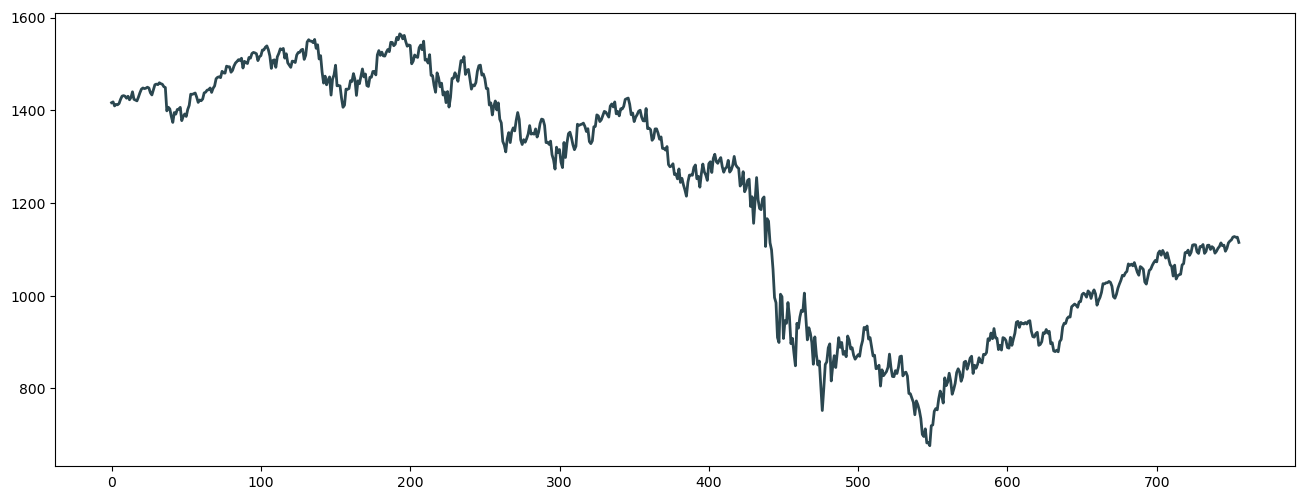

In [63]:
plt.figure(figsize=(16, 6), dpi=100)
plt.plot(spx.values, color=dt_hex, linewidth=2, linestyle='-')
plt.show()

## 设置边界

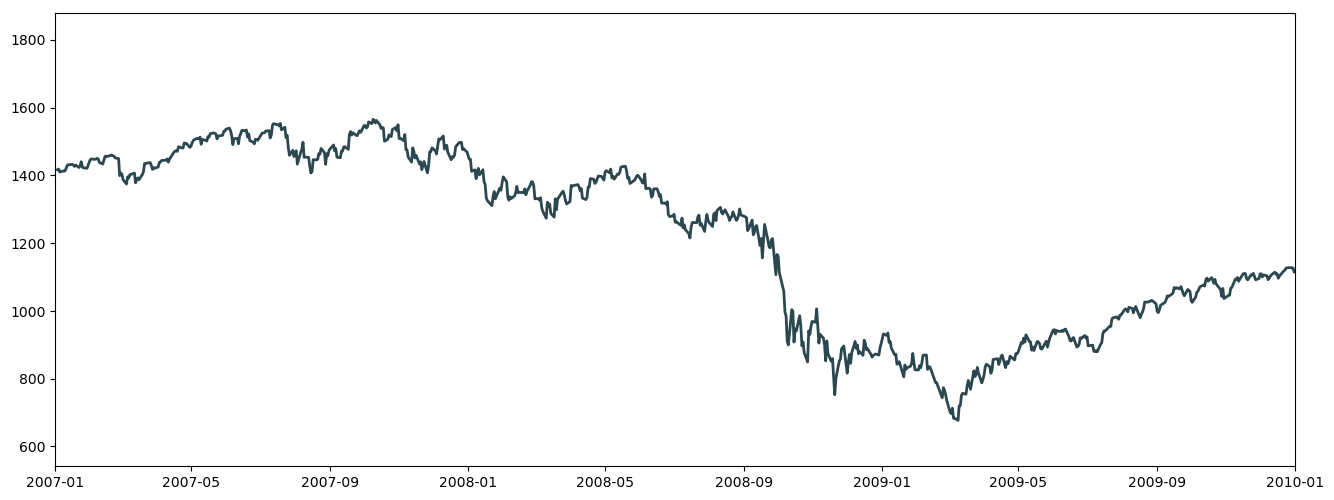

In [64]:
# 在图fig种添加一个坐标系ax
fig = plt.figure(figsize=(16, 6), dpi=100)
ax = fig.add_subplot(1, 1, 1)
x = spx.index
y = spx.values
ax.plot(x, y, color=dt_hex, linewidth=2, linestyle='-')
ax.set_xlim(['1/1/2007', '1/1/2010'])
ax.set_ylim(y.min() * 0.8, y.max() * 1.2)
plt.show()

## 设置刻度和标签

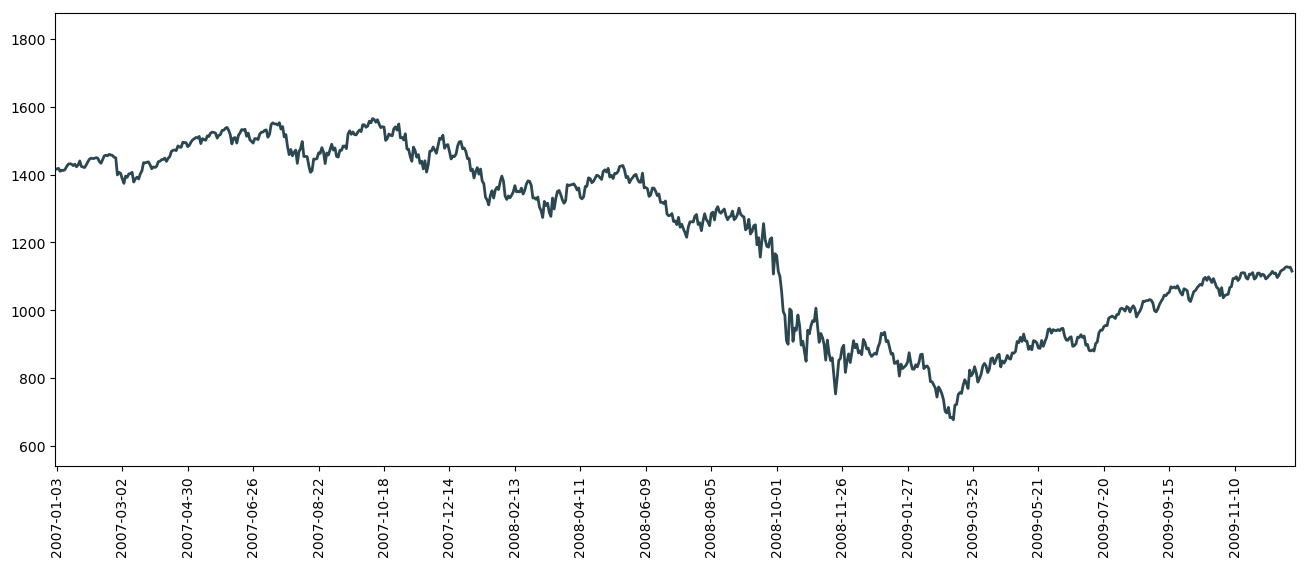

In [65]:
fig = plt.figure(figsize=(16, 6), dpi=100)
ax = fig.add_subplot(1, 1, 1)
x = spx.index
y = spx.values
ax.plot(y, color=dt_hex, linewidth=2, linestyle='-')

ax.set_xlim(-1, len(x) + 1)
ax.set_ylim(y.min() * 0.8, y.max() * 1.2)

ax.set_xticks(range(0, len(x), 40))
ax.set_xticklabels([x[i].strftime('%Y-%m-%d') for i in ax.get_xticks()],
                   rotation=90)

plt.show()

第 7 行设置横轴的边界，下界是 - 1，上界是 len(x) +1。



第 10 行先设置横轴「数值刻度」为 range(0,len(x), 40)，即 0, 40, 80, ....



第 11 行在这些「数值刻度」上写标签，即格式为 %Y-%m-%d 的日期。由于日期个数比较多，而且日期字符比较长，直接在图中显示出来会相互重叠非常难看。这里调节参数 rotation = 90 使得日期逆时针转了 90 度，看上图效果好多了。



## 添加图例

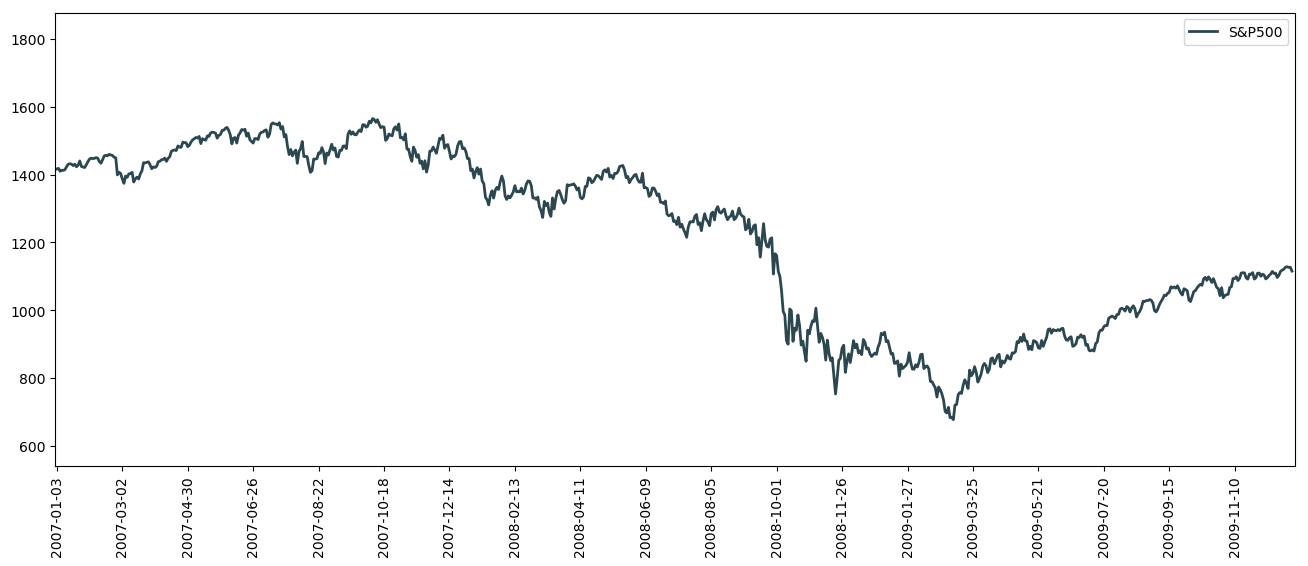

In [66]:
fig = plt.figure(figsize=(16, 6), dpi=100)
ax = fig.add_subplot(1, 1, 1)
x = spx.index
y = spx.values
ax.plot(y, color=dt_hex, linewidth=2, linestyle='-', label='S&P500')
# 参数loc = 0 表示 matplotlib 自动安排一个最好位置显示图例，而 frameon = True 给图例加了外框
ax.legend(loc=0, frameon=True)

ax.set_xlim(-1, len(x) + 1)
ax.set_ylim(y.min() * 0.8, y.max() * 1.2)

ax.set_xticks(range(0, len(x), 40))
ax.set_xticklabels([x[i].strftime('%Y-%m-%d') for i in ax.get_xticks()],
                   rotation=90)

plt.show()

## 添加第二幅图

In [67]:
file_data1 = "./data/data for matplotlib/VIX.csv"
data1 = pd.read_csv(file_data1, index_col=0, parse_dates=True, dayfirst=True)
vix = data1[['Adj Close']].loc['2007-01-01':'2010-01-01']
vix.head(3).append(vix.tail(3))

,Adj Close
Date,
2007-01-03,12.040000
2007-01-04,11.510000
2007-01-05,12.140000
2009-12-29,20.010000
2009-12-30,19.959999
2009-12-31,21.680000


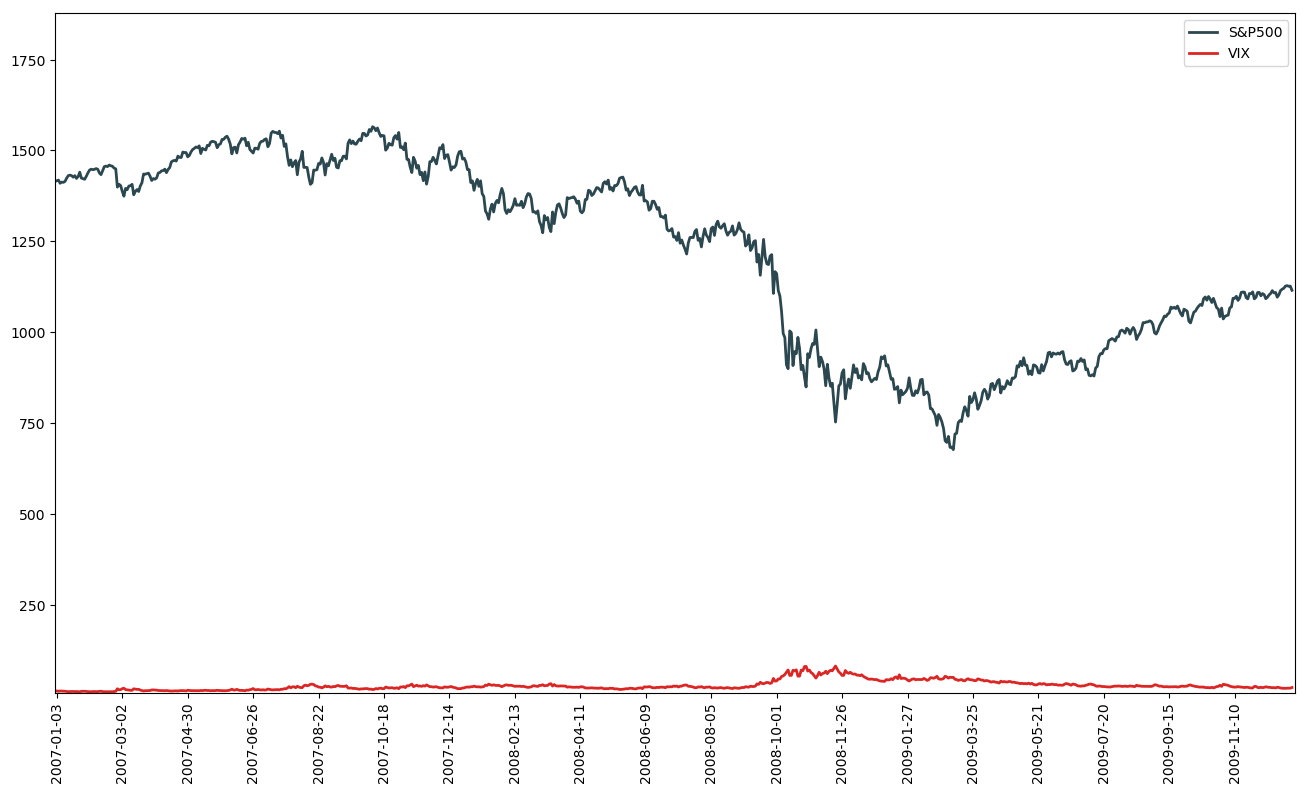

In [68]:
plt.figure(figsize=(16, 9), dpi=100)
x = spx.index
y1 = spx.values
y2 = vix.values
plt.plot(y1, color=dt_hex, linewidth=2, linestyle='-', label='S&P500')
plt.plot(y2, color=r_hex, linewidth=2, linestyle='-', label='VIX')
plt.legend(loc=0, frameon=True)

plt.xlim(-1, len(x) + 1)
plt.ylim(np.vstack([y1, y2]).min() * 0.8, np.vstack([y1, y2]).max() * 1.2)

x_tick = range(0, len(x), 40)
x_label = [x[i].strftime('%Y-%m-%d') for i in x_tick]
plt.xticks(x_tick, x_label, rotation=90)
plt.show()

## 两个坐标系&两幅子图

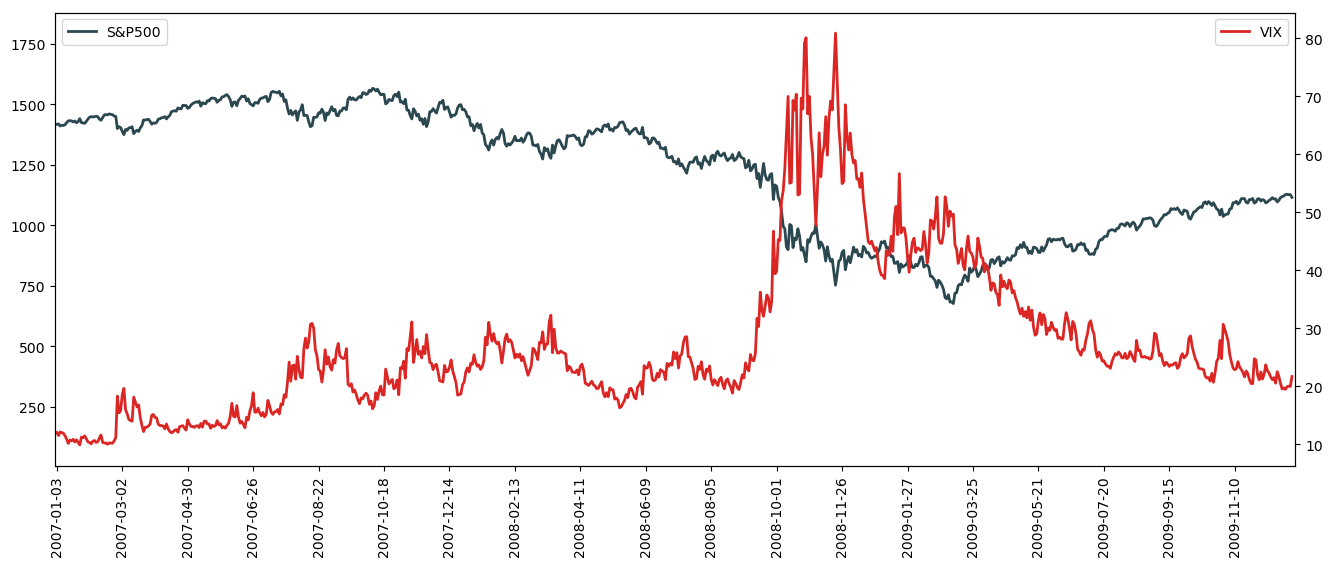

In [69]:
# 两个坐标系
fig = plt.figure(figsize=(16, 6), dpi=100)
ax1 = fig.add_subplot(1, 1, 1)

x = spx.index
y1 = spx.values
y2 = vix.values

ax1.plot(y, color=dt_hex, linewidth=2, linestyle='-', label='S&P500')
ax1.set_xlim(-1, len(x) + 1)
ax1.set_ylim(np.vstack([y1, y2]).min() * 0.8, np.vstack([y1, y2]).max() * 1.2)

x_tick = range(0, len(x), 40)
x_label = [x[i].strftime('%Y-%m-%d') for i in x_tick]
ax1.set_xticks(x_tick)
ax1.set_xticklabels(x_label, rotation=90)
ax1.legend(loc='upper left', frameon=True)

# Add a second axes
ax2 = ax1.twinx()  #创建一个ax1的镜面坐标,即次坐标轴
ax2.plot(y2, color=r_hex, linewidth=2, linestyle='-', label='VIX')
ax2.legend(loc='upper right', frameon=True)

plt.show()

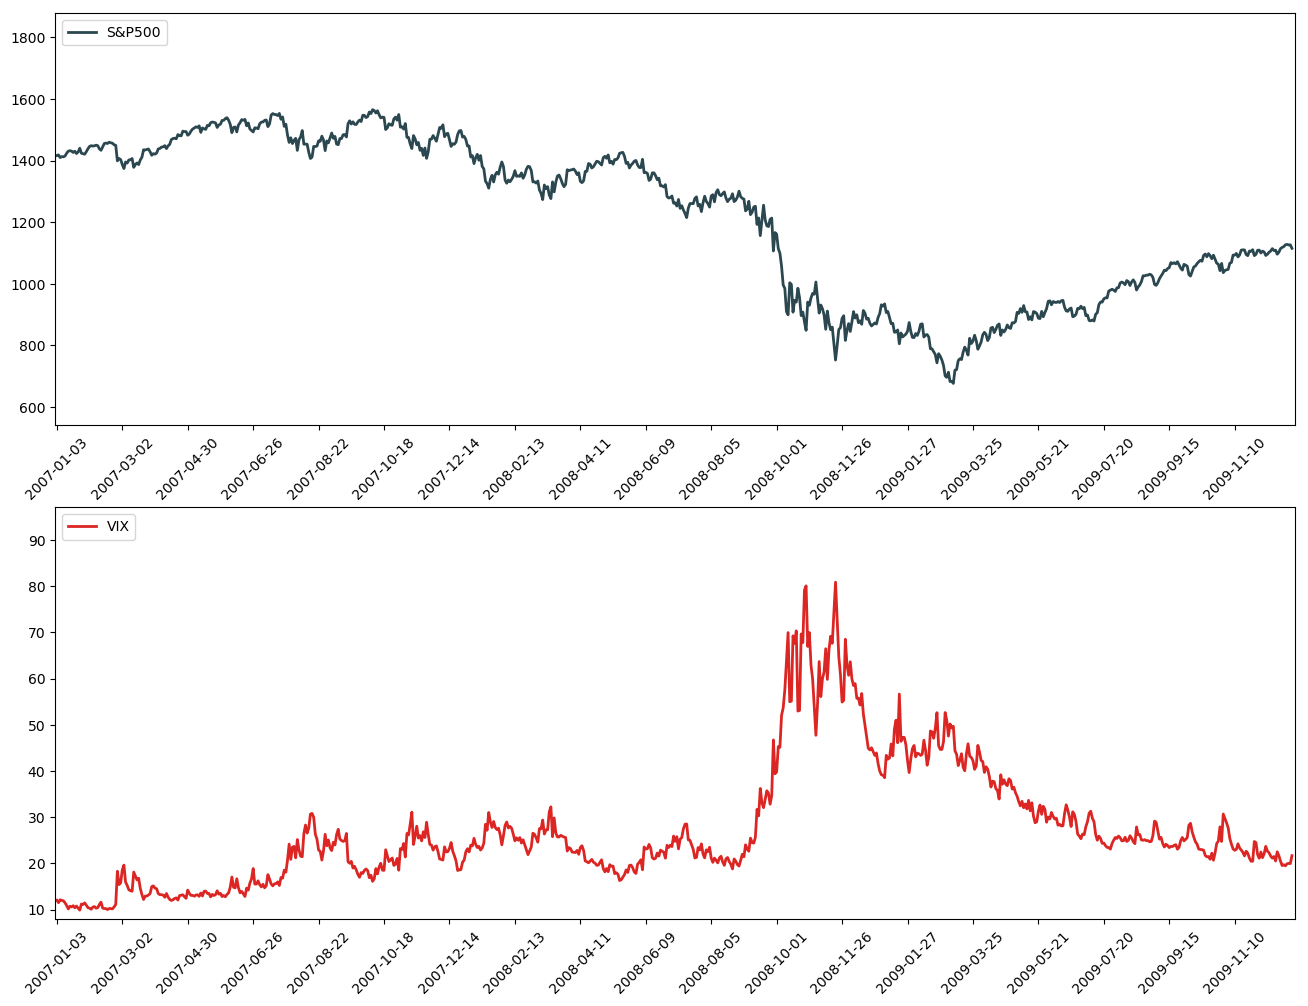

In [70]:
# 两幅子图
plt.figure(figsize=(16, 12), dpi=100)

# subplot1
plt.subplot(2, 1, 1)
x = spx.index
y1 = spx.values

plt.plot(y1, color=dt_hex, linewidth=2, linestyle='-', label='S&P500')
plt.xlim(-1, len(x) + 1)
plt.ylim(y1.min() * 0.8, y1.max() * 1.2)

x_tick = range(0, len(x), 40)
x_label = [x[i].strftime('%Y-%m-%d') for i in x_tick]
plt.xticks(x_tick, x_label, rotation=45)  # 日期旋转45度显示
plt.legend(loc='upper left', frameon=True)

# subplot2
plt.subplot(2, 1, 2)
y2 = vix.values

plt.plot(y2, color=r_hex, linewidth=2, linestyle='-', label='VIX')
plt.xlim(-1, len(x) + 1)
plt.ylim(y2.min() * 0.8, y2.max() * 1.2)

plt.xticks(x_tick, x_label, rotation=45)
plt.legend(loc='upper left', frameon=True)

plt.show()

NameError: name 'impt_date' is not defined

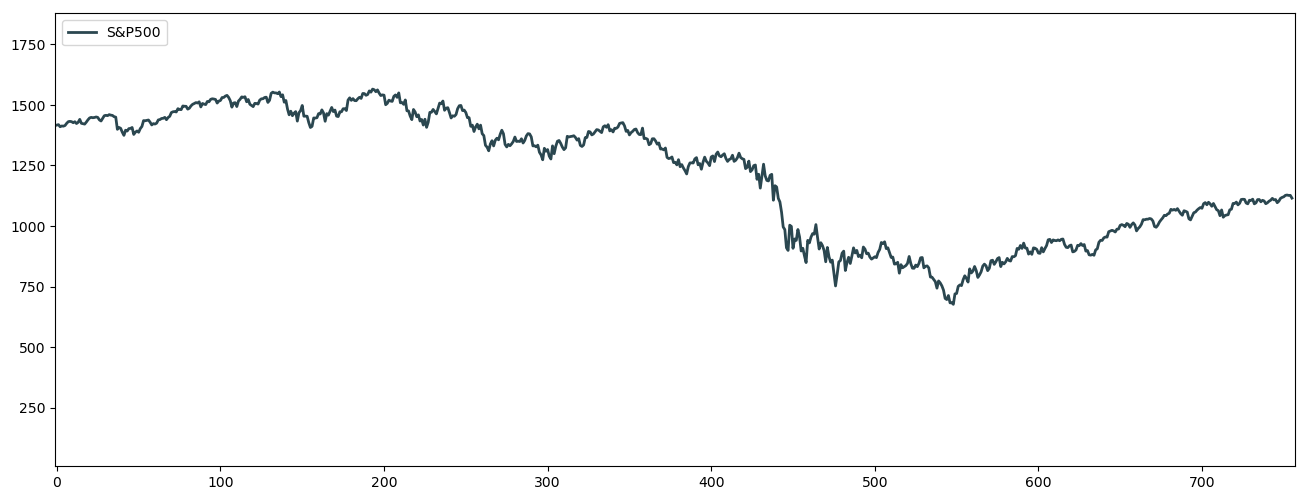

In [71]:
# 设置标注
from datetime import datetime
fig = plt.figure(figsize=(16, 6), dpi=100)

crisis_data = [(datetime(2007, 10, 11), 'Peak of  bull market'),
               (datetime(2008, 3, 12), 'Bear Stearns Fails'),
               (datetime(2008, 9, 15), 'Lehman Bankruptcy'),
               (datetime(2009, 4, 2), 'RBS Sell-off'),
               (datetime(2009, 4, 2), 'G20 Summit')]

ax1 = fig.add_subplot(1, 1, 1)
x = spx.index
y1 = spx.values
y2 = vix.values

ax1.plot(y1, color=dt_hex, linewidth=2, linestyle='-', label='S&P500')
ax1.set_xlim(-1, len(x) + 1)
ax1.set_ylim(np.vstack([y1, y2]).min() * 0.8, np.vstack([y1, y2]).max() * 1.2)
ax1.legend(loc='upper left', frameon=True)


for date, label in crisis_data:
    date = date.strftime('%Y-%m-%d')
    impt_date.append(date)

    xi = x.get_loc(date)
    impt_tick.append(xi)
    yi = spx.asof(date)

    ax1.scatter(xi, yi, 80, color=r_hex)
    ax1.annotate(label, xy=(xi, yi + 60), xytext=(xi, yi + 300),
                 arrowprops=dict(facecolor='black', headwidth=4, width=1, headlength=6),
                 horizontalalignment='left', verticalalignment='top')

# Add a second axes
ax2 = ax1.twinx()
ax2.plot(y2, color=r_hex, linewidth=2, linestyle='-', label='VIX')
ax2.legend(loc='upper right', frameon=True)

plt.show()


In [ ]:
# 调整副线透明度
ax2.plot(y2,color=r_hex,linewidth=2,linestyle='-',label='VIX',alpha=0.3)

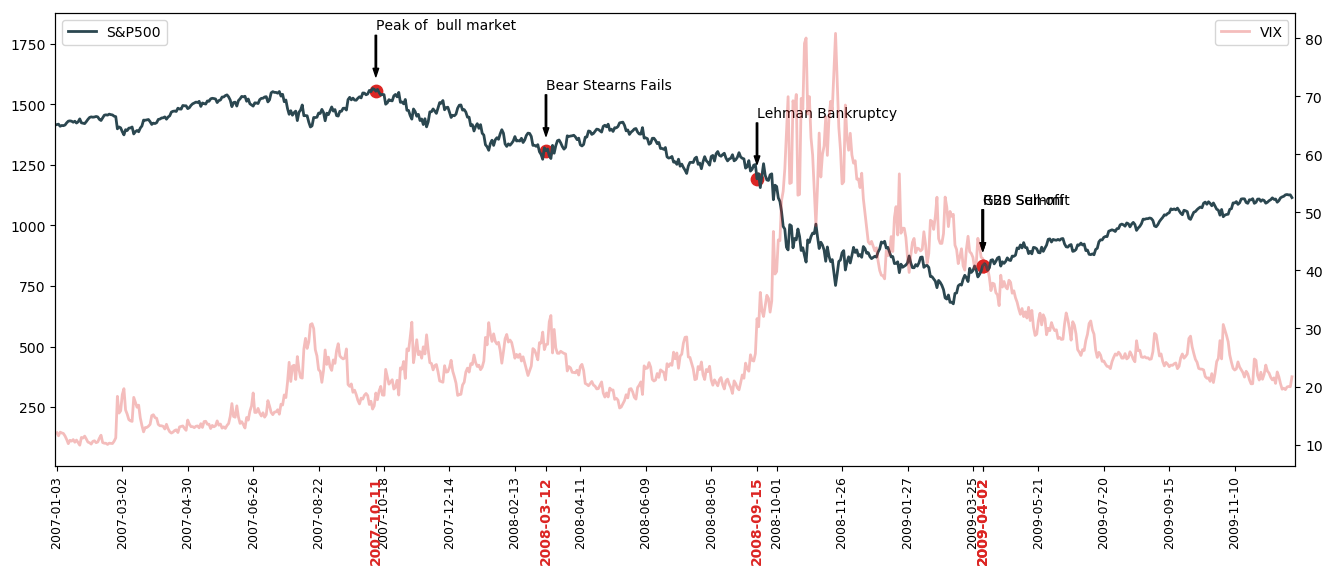

In [74]:
# 完善细节
from datetime import datetime
fig = plt.figure(figsize=(16, 6), dpi=100)

crisis_data = [(datetime(2007, 10, 11), 'Peak of  bull market'),
               (datetime(2008, 3, 12), 'Bear Stearns Fails'),
               (datetime(2008, 9, 15), 'Lehman Bankruptcy'),
               (datetime(2009, 4, 2), 'RBS Sell-off'),
               (datetime(2009, 4, 2), 'G20 Summit')]

ax1 = fig.add_subplot(1, 1, 1)
x = spx.index
y1 = spx.values
y2 = vix.values

ax1.plot(y1, color=dt_hex, linewidth=2, linestyle='-', label='S&P500')
ax1.set_xlim(-1, len(x) + 1)
ax1.set_ylim(np.vstack([y1, y2]).min() * 0.8, np.vstack([y1, y2]).max() * 1.2)
ax1.legend(loc='upper left', frameon=True)

init_tick = list(range(0, len(x), 40))
impt_tick = []
impt_date = []

for date, label in crisis_data:
    date = date.strftime('%Y-%m-%d')
    impt_date.append(date)

    xi = x.get_loc(date)
    impt_tick.append(xi)
    yi = spx.asof(date)

    ax1.scatter(xi, yi, 80, color=r_hex)
    ax1.annotate(label, xy=(xi, yi + 60), xytext=(xi, yi + 300),
                 arrowprops=dict(facecolor='black', headwidth=4, width=1, headlength=6),
                 horizontalalignment='left', verticalalignment='top')

x_tick = init_tick + impt_tick
x_label = [x[i].strftime('%Y-%m-%d') for i in x_tick]
ax1.set_xticks(x_tick)
ax1.set_xticklabels(x_label, rotation=90)

for i, label in enumerate(ax1.get_xticklabels()):
    if i >= len(init_tick):
        label.set_color(r_hex)
        label.set_fontweight('bold')
    else:
        label.set_fontsize(9)

# Add a second axes
ax2 = ax1.twinx()
ax2.plot(y2, color=r_hex, linewidth=2, linestyle='-', label='VIX', alpha=0.3)
ax2.legend(loc='upper right', frameon=True)

plt.show()


# 画有效图

选择合适的图表非常重要，图表展示关系分为四大类：

- 分布（distribution）
- 联系(relationship)
- 比较(comparison)
- 构成(composition)

![1](./img/图表展示关系.png)

以量化金融举例,常用的几种类型:

- 用直方图来展示股票价值和收益的分布
- 散点图来展示两支股票之间的联系
- 用折线图来比较汇率在不同窗口的移动平均线
- 用饼状图来展示股票组合的构成成分

用 YahooFinancials API 来下载若干资产的一年历史数据 (安装该 API 用 pip install yahoofinancials)

- 起始日：2018-04-29

- 终止日：2019-04-29

- 五只股票：英伟达、亚马逊、阿里巴巴、脸书、苹果

- 三个汇率：欧元美元、美元日元、美元人民币

In [111]:
from yahoofinancials import YahooFinancials
import pandas as pd
import numpy as np

In [112]:
start_date='2018-04-29'
end_date='2019-04-29'
stock_code=['NVDA','AMZN','BABA','FB','AAPL']
currency_code=['EURUSD=X','JPY=X','CNY=X']

In [113]:
stock=YahooFinancials(stock_code)
currency=YahooFinancials(currency_code)
stock_daily=stock.get_historical_price_data(start_date,end_date,'daily')
currency_daily=currency.get_historical_price_data(start_date,end_date,'daily')

In [114]:
# 自定义格式转换函数
def data_converter(price_data,code,asset):
    # convert raw into dataframe
    if asset=='FX':
        code=str(code[3:] if code[:3]=='USD' else code)+'=X'
        
    columns=['open','close','low','high']
    price_dict=price_data[code]['prices']
    index=[p['formatted_date'] for p in price_dict]
    price=[[p[c] for c in columns] for p in price_dict]
    
    data=pd.DataFrame(price,index=pd.Index(index,name='date'),
                     columns=pd.Index(columns,name='OHLC'))
    return data

第 3 行完全是为了 YahooFinancial 里面的输入格式准备的。如果 Asset 是股票类，直接用其股票代码；如果 Asset 是汇率类，一般参数写成 EURUSD 或 USDJPY



如果是 EURUSD，转换成 EURUSD=X

如果是 USDJPY，转换成 JPY=X



第 6 行定义好开盘价、收盘价、最低价和最高价的标签。



第 7 行获取出一个「字典」格式的数据。



第 8, 9 行用列表解析式 (list comprehension) 将日期和价格获取出来。



第 11 到 13 行定义一个 DataFrame



值为第 9 行得到的 price 列表

行标签为第 8 行得到的 index 列表

列标签为第 6 行定义好的 columns 列表

In [115]:
EURUSD = data_converter( currency_daily, 'EURUSD', 'FX' )
EURUSD.head(3).append(EURUSD.tail(3))

OHLC,open,close,low,high
date,,,,
2018-04-29,1.212856,1.212283,1.206636,1.213857
2018-04-30,1.208313,1.208123,1.198351,1.208459
2018-05-01,1.199213,1.199156,1.195414,1.203109
2019-04-24,1.115698,1.115349,1.112174,1.116400
2019-04-25,1.113710,1.113685,1.112298,1.117281
2019-04-28,1.114902,1.115026,1.114554,1.116994


In [116]:
NVDA = data_converter( stock_daily, 'NVDA',' EQ' )
NVDA.head(3).append(NVDA.tail(3))

OHLC,open,close,low,high
date,,,,
2018-04-30,226.990005,224.899994,224.119995,229.000000
2018-05-01,224.570007,227.139999,222.199997,227.250000
2018-05-02,227.000000,226.309998,225.250000,228.800003
2019-04-24,191.089996,191.169998,188.639999,192.809998
2019-04-25,189.550003,186.910004,183.699997,190.449997
2019-04-26,180.710007,178.089996,173.300003,180.889999


## 直方图

直方图 (histogram chart)，又称质量分布图，是一种统计报告图，由一系列高度不等的纵向条纹或线段表示数据分布的情况。 一般用横轴表示数据类型，纵轴表示分布情况。在 Matplotlib 里的语法是

- plt.hist()

- ax.hist()

In [117]:
p_NVDA=NVDA['close']

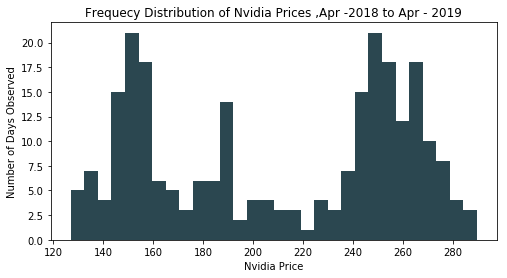

In [118]:
fig=plt.figure(figsize=(8,4))
plt.hist(p_NVDA,bins=30,color=dt_hex)
plt.xlabel('Nvidia Price')
plt.ylabel('Number of Days Observed')
plt.title('Frequecy Distribution of Nvidia Prices ,Apr -2018 to Apr - 2019')

plt.show()

在本例中函数 hist() 里的参数有



p_NVDA：Series，也可以是 list 或者 ndarray

bins：分成多少堆

colors：用之前定义的深青色

In [119]:
# 研究NVDA的对数收益分布
date=p_NVDA.index
price=p_NVDA.values
r_NVDA=pd.Series(np.log(price[1:]/price[:-1]),index=date[1:])

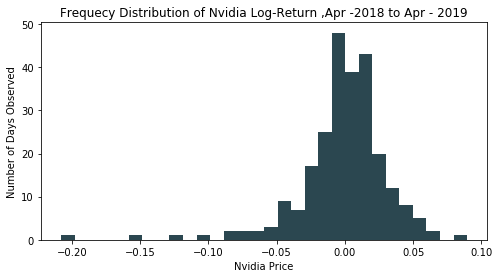

In [120]:
fig=plt.figure(figsize=(8,4))

plt.hist(r_NVDA,bins=30,color=dt_hex)
plt.xlabel('Nvidia Price')
plt.ylabel('Number of Days Observed')
plt.title('Frequecy Distribution of Nvidia Log-Return ,Apr -2018 to Apr - 2019')

plt.show()

首先对数收益的计算公式为



    r(t) = ln(P(t)/P(t-1)



得到 r_NVDA。计算一天的收益率需要两天的价格，因此用 p_NVDA 计算 r_NVDA 时，会丢失最新一天的数据，因此我们用 date[1:] 作为 r_NVDA 的行标签 (index)。

## 散点图

散点图 (scatter chart) 用两组数据构成多个坐标点，考察坐标点的分布，判断两变量之间是否存在某种联系的分布模式。在 Matplotlib 里的语法是



- plt.scatter()

- ax.scatter()

In [126]:
# 计算价格和对数收益率
AMZN=data_converter(stock_daily,'AMZN','EQ')
BABA=data_converter(stock_daily,'BABA','EQ')

p_AMZN=AMZN['close']
p_BABA=BABA['close']

date=p_AMZN.index
price=p_AMZN.values
r_AMZN=pd.Series(np.log(price[1:]/price[:-1]),index=date[1:])

date=p_BABA.index
price=p_BABA.values
r_BABA=pd.Series(np.log(price[1:]/price[:-1]),index=date[1:])

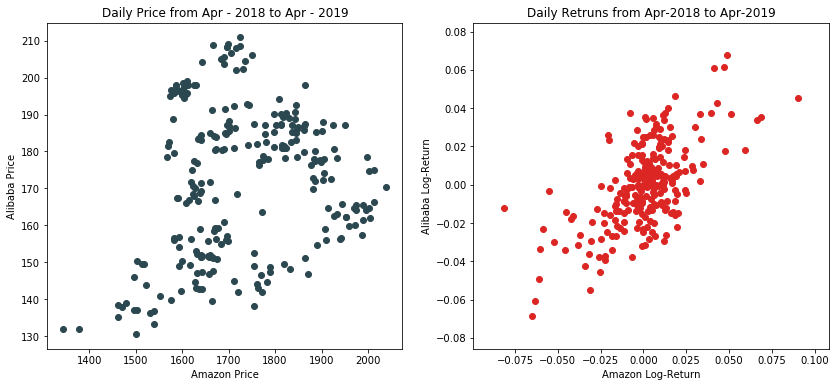

In [128]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(14,6))

axes[0].scatter(p_AMZN,p_BABA,color=dt_hex)
axes[0].set_xlabel('Amazon Price')
axes[0].set_ylabel('Alibaba Price')
axes[0].set_title("Daily Price from Apr - 2018 to Apr - 2019")

axes[1].scatter(r_AMZN,r_BABA,color=r_hex)
axes[1].set_xlabel("Amazon Log-Return")
axes[1].set_ylabel("Alibaba Log-Return")
axes[1].set_title("Daily Retruns from Apr-2018 to Apr-2019")

plt.show()

在本例中函数 scatter() 里的参数有



p_AMZN (r_AMZN)：Series，也可以是 list 或者 ndarray

p_BABA (r_BABA)：Series，也可以是 list 或者 ndarray

colors：用之前定义的深青色和红色



从右图来看，亚马逊和阿里巴巴在这端时期的表现正相关，如果做线性回归是一条斜率为正的线。

## 折线图

折线图 (line chart) 显示随时间而变化的连续数据，因此非常适用于显示在相等时间间隔下数据的趋势。在 Matplotlib 里的语法是



- plt.plot()

- ax.plot()

In [130]:
# 获取收盘价
curr='EURUSD'
EURUSD=data_converter(currency_daily,curr,'FX')
rate=EURUSD['close']

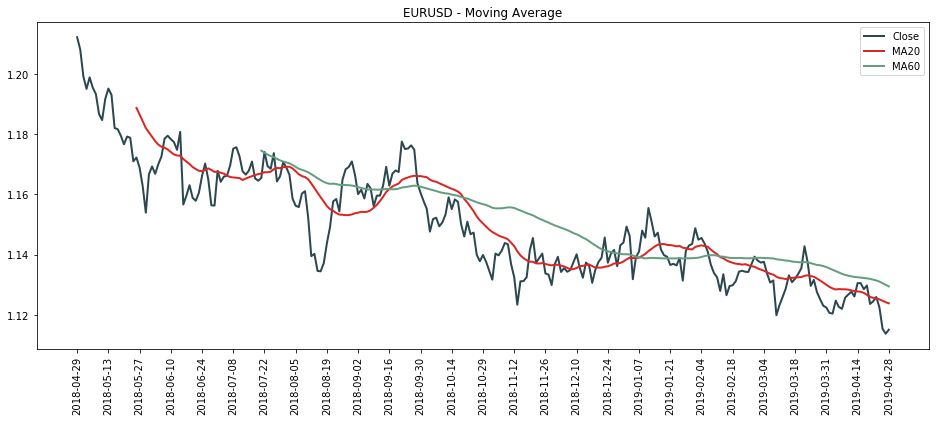

In [141]:
#用 Pandas 里面的 rolling() 函数来计算 MA，在画出收盘价，MA20 和 MA60 三条折线
fig=plt.figure(figsize=(16,6))
ax=fig.add_subplot(1,1,1)

ax.set_title(curr+' - Moving Average')
ax.set_xticks(range(0,len(rate.index),10))
ax.set_xticklabels([rate.index[i] for i in ax.get_xticks()],rotation=90)

ax.plot(rate,color=dt_hex,linewidth=2,label='Close')

MA_20=rate.rolling(20).mean()
MA_60=rate.rolling(60).mean()

ax.plot(MA_20,color=r_hex,linewidth=2,label='MA20')
ax.plot(MA_60,color=g_hex,linewidth=2,label='MA60')

ax.legend(loc=0)

plt.show()

在本例中函数 plot() 里的参数有



rate, MA_20, MA_60：Series，也可以是 list 或者 ndarray

colors：用之前定义的深青色，红色，绿色

linewidth：像素 2

label：用于显示图例



上面代码最关键的就是第 10 和 11 行，用 rolling(n) 函数对 rate 求 n 天移动均值。从图中注意到绿色的 MA60最短，红色的 MA20 其次。原因很简单，假如一年有 252 个交易日，那么第 1 个 MA60 值需要第 1 到 60 个汇率，第 2 个 MA60 值需要第 2 到 61 个汇率，第 193 个 MA60 值需要第 193 到 252 个汇率。最终只有 193 个 MA60。同理可得到只有 223 个 MA20。

## 饼状图

饼状图 (pie chart) 是一个划分为几个扇形的圆形统计图表，用于描述量、频率或百分比之间的相对关系。 在饼状图中，每个扇区面积大小为其所表示的数量的比例。在 Matplotlib 里的语法是



- plt.pie()

- ax.pie()



我们来看看如何画出一个股票投资组合在 2019 年 4 月 26 日的饼状图，假设组合里面有 100 股英伟达，20 股亚马逊，50 股阿里巴巴，30 股脸书和 40 股苹果

In [142]:
# 计算组合里五支股票在 2019 年 4 月 26 日的市值 (market value, MV)
stock_list=['NVDA','AMZN','BABA','FB','AAPL']
date='2019-04-26'

MV=[data_converter(stock_daily,code,'EQ')['close'][date] for code in stock_list]
MV=np.array(MV)*np.array([100,20,50,30,40])

第 4 行用了列表解析式来获取 stock_list 每支股票的价格，第 5 行将价格乘上数量得到市值。

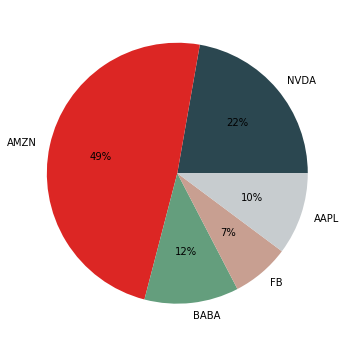

In [148]:
# 设定好五种颜色和百分数格式 %.0f%% (小数点后面保留 0 位)，画出饼状图
fig=plt.figure(figsize=(16,6))
ax=fig.add_subplot(1,1,1)

ax.pie(MV,labels=stock_list,colors=[dt_hex,r_hex,g_hex,tn_hex,g25_hex],\
       autopct='%.0f%%')

plt.show()

在本例中函数 pie() 里的参数有



MV：股票组合市值，ndarray

labels：标识，list

colors：用之前定义的一组颜色，list

autopct：显示百分数的格式，str

把饼当成钟，大多数人习惯顺时针的看里面的内容，因此把面积最大的那块的一条边 (见下图) 放在 12 点的位置最能突显其重要性，之后按面积从大到小顺时针排列。



在画饼状图前，我们需要额外做两件事：



按升序排列 5 只股票的市值

设定 pie() 的相关参数达到上述「最大块放 12 点位置」的效果

In [149]:
idx = MV.argsort()[::-1]
MV = MV[idx]
stock_list = [ stock_list[i] for i in idx ]
print( MV )
print( stock_list )

[ 39012.60009766  17808.99963379   9354.49981689   8172.00012207
   5744.70016479]
['AMZN', 'NVDA', 'BABA', 'AAPL', 'FB']


设定参数



startangle = 90 是说第一片扇形 (AMZN 深青色那块) 的左边在 90 度位置

counterclock = False 是说顺时针拜访每块扇形

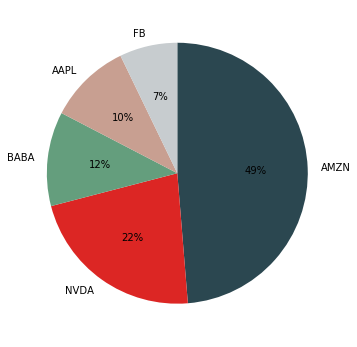

In [150]:
fig=plt.figure(figsize=(16,6))
ax=fig.add_subplot(1,1,1)

ax.pie(MV,labels=stock_list,colors=[dt_hex,r_hex,g_hex,tn_hex,g25_hex],\
       autopct='%.0f%%',startangle=90,counterclock=False)

plt.show()

当饼状图里面扇形多过 5 个时，面积相近的扇形大小并不容易一眼辨别出来，不信看上图的 BABA 和 APPL，没看到数字很难看出那个面积大。但绝大多数人是感官动物，图形和数字肯定先选择看图形，这个时候用柱状图 (bar chart) 来代替饼状图，每个市值成分大小一目了然 (好图就是能让用户能最快的抓住核心信息)。

用 ax.bar() 函数来画柱状图，为了和饼状图的信息一致，几个关键操作为



- 第 4 行计算出市值的百分数 pct_MV

- 第 8, 9 行设置横轴刻度 (0,1,2,3,4) 和标签 (stock_list)

- 第 12, 13 行在特定位置上 (x+0.04, y+0.05/100) 将 pct_MV 以 {0:.0%} 的格式 (不保留小数点) 写出来，这些位置试几次看图的效果就可以确定下来。

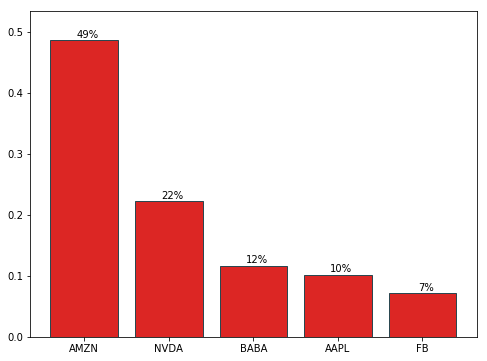

In [160]:
fig=plt.figure(figsize=(8,6))
ax=fig.add_subplot(1,1,1)

pct_MV=MV/np.sum(MV)
index=np.arange(len(pct_MV))

ax.bar(index,pct_MV,facecolor=r_hex,edgecolor=dt_hex)
ax.set_xticks(index)
ax.set_xticklabels(stock_list)
ax.set_ylim(0,np.max(pct_MV)*1.1)

for x ,y in  zip (index,pct_MV):
    ax.text(x+0.04,y+0.05/100,'{0:.0%}'.format(y),ha='center',va='bottom')

plt.show()

在本例中函数 bar() 里的参数有



- index：横轴刻度，ndarray

- pct_MV：股票组合市值比例，ndarray

- facecolor：柱状颜色，红色

- edgecolor：柱边颜色，深青色

如果柱状很多时，或者标签名字很长时，用横向柱状图 (horizontal bar chart)，函数为 ax.barh()。代码和上面非常类似，就是把横轴和纵轴的调换了一下。

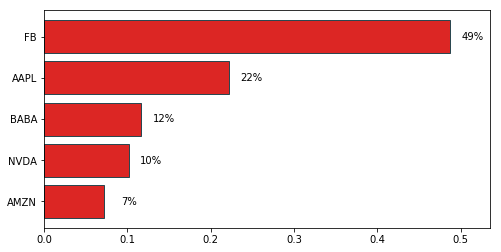

In [165]:
fig=plt.figure(figsize=(8,4))
ax=fig.add_subplot(1,1,1)

pct_MV=MV[::-1]/np.sum(MV)
index=np.arange(len(pct_MV))

ax.barh(index,pct_MV,facecolor=r_hex,edgecolor=dt_hex)
ax.set_yticks(index)
ax.set_yticklabels(stock_list)
ax.set_xlim(0,np.max(pct_MV)*1.1)

for x ,y in  zip (pct_MV,index):
    ax.text(x+0.04,y,'{0:.0%}'.format(x),ha='right',va='center')

plt.show()